In [7]:
import sys
import pandas as pd
import json
import numpy as np
from helper import *
import argparse
from rsa import RSA
import matplotlib.pyplot as plt
import os

with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

[['CENTER SCATEBOARDER'], ['person in middle'], ['the person in the middle']]
/scratch3/hle/refCOCO/train/imgs_by_id/138114.jpg


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,skateboard-1,138114,2204881,38087,0.016146,348.618805,255.333084,85.134796,58.260208,0.000624,...,0.002493,0.002493,0.002492,0.002493,0.002492,0.002493,0.002494,0.002493,0.002498,0.002493
1,pants-1,138114,2204881,38087,0.020588,71.796127,241.726807,59.392426,106.491211,0.000624,...,0.002493,0.002492,0.002493,0.002492,0.002492,0.002492,0.002493,0.002493,0.002493,0.002492
2,shoe-1,138114,2204881,38087,0.002601,397.779785,267.687531,37.105988,21.534210,0.000624,...,0.002494,0.002494,0.002494,0.002493,0.002493,0.002493,0.002495,0.002494,0.002499,0.002493
3,woman-1,138114,2204881,38087,0.066280,64.291809,79.759079,85.883865,237.077408,0.000624,...,0.002494,0.002493,0.002494,0.002493,0.002493,0.002493,0.002494,0.002494,0.002494,0.002503
4,skateboard-2,138114,2204881,38087,0.013312,73.718437,328.398132,72.622307,56.311249,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002494,0.002501,0.002493
5,girl-1,138114,2204881,38087,0.080737,155.507553,68.652100,106.072006,233.826660,0.000624,...,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002495,0.002503
6,shirt-1,138114,2204881,38087,0.018459,423.136597,111.826744,75.149445,75.456276,0.000624,...,0.002492,0.002492,0.002493,0.002492,0.002492,0.002492,0.002492,0.002493,0.002494,0.002492
7,shoe-2,138114,2204881,38087,0.005281,458.361328,293.366241,41.026459,39.543549,0.000624,...,0.002494,0.002495,0.002494,0.002494,0.002494,0.002494,0.002495,0.002494,0.002502,0.002494
8,woman-2,138114,2204881,38087,0.067240,154.727951,55.673347,101.647446,203.212616,0.000624,...,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002495,0.002495,0.002495,0.002506
9,sweater-1,138114,2204881,38087,0.026246,68.873558,121.252144,69.775169,115.552971,0.000624,...,0.002493,0.002493,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493


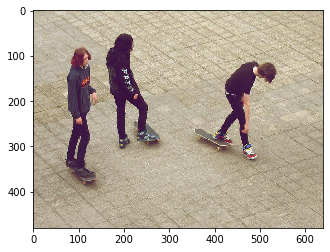

In [2]:
file_id = 21540#3278#182

df = pd.read_csv(os.path.join(data_path,f'refCOCO/train/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')

with open(os.path.join(data_path,f'refCOCO/train/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
print(refs)
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/train/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
df

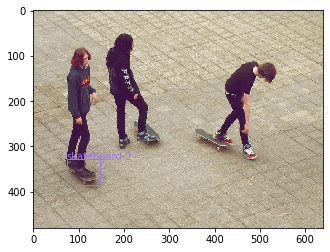

In [3]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in [4]:#rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['CENTER SCATEBOARDER', 'person in middle', 'the person in the middle']


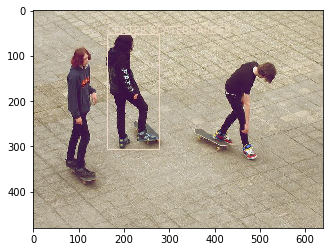

In [4]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [8]:
#matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
rsa_agent = RSA(df)
#targets = [matched_label[file_id][j][1] for j in range(min(3, len(matched_label[file_id])))]

rsa_agent.objects_by_type


# word_lists = [rsa_agent.full_speaker(target) for target in targets]

# expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]

defaultdict(list,
            {'boy': ['boy-1'],
             'girl': ['girl-1', 'girl-2', 'girl-3'],
             'ground': ['ground-1'],
             'man': ['man-1'],
             'pants': ['pants-1'],
             'pavement': ['pavement-1'],
             'people': ['people-1'],
             'person': ['person-1'],
             'shirt': ['shirt-1', 'shirt-2'],
             'shoe': ['shoe-1', 'shoe-2', 'shoe-3'],
             'skateboard': ['skateboard-1', 'skateboard-2'],
             'sweater': ['sweater-1'],
             'tshirt': ['tshirt-1'],
             'woman': ['woman-1', 'woman-2', 'woman-3']})

In [14]:
# the top 3 guesses based on top 3 best match
# print(targets)
# print(expression)

# def full_speaker(self, obj):
#         output = []
#         prior = self.objectPrior()
#         t = ''
#         print('HELLOSDFDSF')
#         for iter in range(10):
#             # print('iteration',iter)
#             print('prior:', prior)
#             utts,pro, utterance_type = self.speaker(obj, prior, t, output) 
#             #print(iter, prior)
#             if len(utts) > 0:
#                 idx=np.argmax(pro)
#                 # print("YOYO",utts[idx])
#             if pro[idx] <= 0:
#                 new_c = prior
#             else:
#                 u = utts[idx]
#                 new_c = self.literal_listener(u,prior, utterance_type)
#                 output.append(u)
#             ent = self.entropy(new_c)
#             # print(iter,'new_c',new_c)
#             # print(iter,'ent',ent)
#             prior = new_c
#             t = output[0]
#             if ent <= BOUND:
#                 break
#         return output
# rsa_agent.full_speaker = full_speaker

In [9]:
rsa_agent.full_speaker('woman-2')

# of woman: 3
woman-1 ['woman-1', 'woman-2', 'woman-3']
the first from left
woman-2 ['woman-1', 'woman-2', 'woman-3']
the second from left
woman-3 ['woman-1', 'woman-2', 'woman-3']
the first from right
skateboard-1	pants-1	shoe-1	woman-1	skateboard-2	girl-1	shirt-1	shoe-2	woman-2	sweater-1	man-1	woman-3	people-1	pavement-1	tshirt-1	ground-1	girl-2	boy-1	shoe-3	girl-3	person-1	shirt-2	
0.00658361847693361	0.008395187000935823	0.0010606168050952243	0.027026344306885726	0.005428136518766606	0.0329215550177726	0.007526735984738901	0.0021534025274588995	0.027417804891038473	0.010702064721590401	0.08299317407040409	0.034302765109011264	0.15623560977514636	0.16914802457889805	0.007618833366838508	0.24209279687822852	0.02730150781251918	0.07412307923009194	0.002939792784754313	0.0324539119482241	0.031052766082971764	0.010522272111695643	
ENTROPY: 1.9345161128569779
skateboard-1	pants-1	shoe-1	woman-1	skateboard-2	girl-1	shirt-1	shoe-2	woman-2	sweater-1	man-1	woman-3	people-1	pavement-1	tshirt-

/scratch3/hle/git/rsa_refer/rsa.py:111: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


['girl', 'swinging', 'blond']